# 1. Phython OpenCV에서 얼굴 정렬
- 얼굴정렬 : 입력이미지(좌표계)의 서로 다른 점 집합을 하나의 좌표계(출력좌표계)로 변환하는 프로세스
- 출력좌표계 : 고정 참조 프레임으로 정의 가능
- 목표 : 모든 입력좌표를 뒤틀고 변환하고 출력 좌표 정렬
- 방법 : 회전, 이동, 크기조정 이용

# 2. 얼굴 정렬 과정
- 이미지에서 얼굴과 눈 감지
- 감지된 눈의 중심 계산
- 두 눈 중앙 사이에 선 연결
- 두 눈 사이의 수평선 그리기
- 삼각형의 세 변 길이 계산
- 각도 계산
- 계산된 각도로 이미지 회전
- 이미지 크기 조정

# 3. Haar Cascade 
- OpenCV 의 객체검출 알고리즘
- 이미지/비디오에서 특정 객체 탐지 위해 적용하는 기술
- 머신러닝 기반의 객체 검출 방법 중 하나
- 이미지 내에서 객체의 특징 찾고 해당 특지을 기반으로 객체 검출하는 방식
- 흑백 이미지에서 개체 특징 추출찾는데 분류기(classifier) 사용

# 4. Haar Cascade Classifier 
- 얼굴, 눈, 미소 감지
- 2002년에 Paul Viola와 Michael Jones는 "Rapid Object Detection using a Boosted Cascade of
Simple Feature "라는 제목의 연구 기사
- viola, jones로 인종, 연령대 고려

# 5. Viola-Jones(비올라존스) 알고리즘
- Haar 분류기 학습시키기 : ML 기반 접근방식 
- Haar 기능 선택 : 직사각형 블록 슬라이딩 윈도우 이용해서 픽셀의 밝기 구분 
- 일체형 이미지 생성 : 이미지 픽셀 강도 미리 계산 후 중간 형식 저장 
- Adaboos 알고리즘 적용 : 16만개 이 상의 기능 제공하는 방법을 가중치 이용하여 빠르게 계산하여 6만개로 줄임
- 캐스케이드 분류기 : 특징을 38단계까지 통과시키면 이상없이 얼굴 감지한 것으로 판단

# 6. 얼굴인식 실습

>## 0. 사전준비(XML다운로드)
- 다운로드 : https://raw.githubusercontent.com/kipr/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
- 다운로드2 : https://github.com/kipr/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

>## 1) OpenCV로 얼굴 정렬
- 얼굴 / 눈 감지를 위해 OpenCV 캐스케이드 구성
- OpenCV 캐스케이드 : 정면얼굴 감지 및 눈 감지모듈

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 얼굴 및 눈 객체 인식 캐스케이드 생성
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

print(face_cascade, eye_cascade)

< cv2.CascadeClassifier 0x7f8593096710> < cv2.CascadeClassifier 0x7f85604edcb0>


>## 2) 얼굴에서 이미지 데이터 읽기

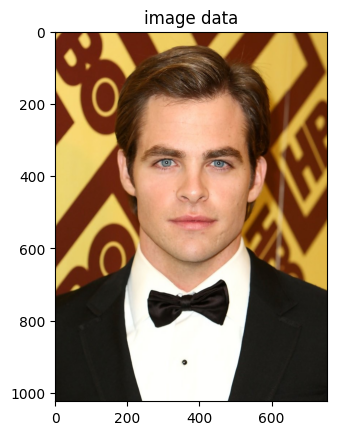

In [ ]:
image = cv2.imread('chris.jpg')

# RGB 컨버터 필요
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title('image data')
plt.show()

>## 2) 얼굴 이미지 바운딩 박스
- 케스케이드는 그레이 스케이미지에서만 작동!
- 그레이 스케일로 변환 후 박싱 처리

얼굴좌표 :  186 212 397 397


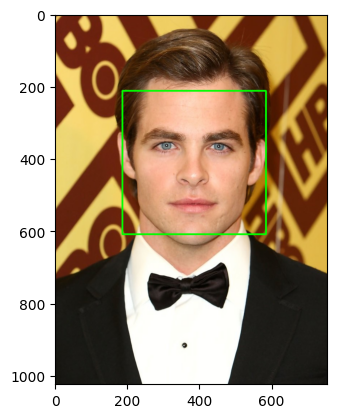

In [ ]:
# 그레이 스케일 이미지 변환
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

faces = face_cascade.detectMultiScale(image_gray, 1.1, 4)


# detectMultiScale() 바운딩 박스 좌표 획득
# 인자값 : 그레이이미지, 축소할 이미지배율인수, 이웃의 최소수
for(x,y,w,h) in faces :
  print("얼굴좌표 : ", x,y,w,h)
  cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 3)

plt.imshow(image)
plt.show()

>## 3) 눈감지
>- 얼굴 박스 안에 2개의 관심 영역 필요 
>- 1개 영역 : 눈 감지할 회색조 이미지
>- 1개 영역 : 사각형 그릴 컬러 이미지 

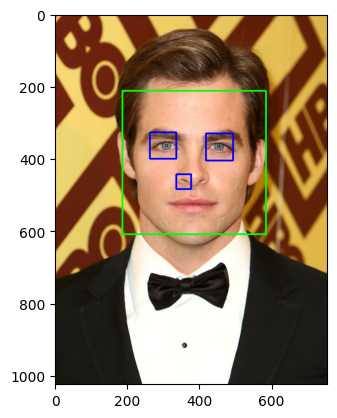

In [ ]:
roi_gray = image_gray[y:(y+h), x:(x+w)]
roi_color = image[y:(y+h), x:(x+w)]

#print(roi_gray)
#print(roi_color)

# 눈 변수 생성
eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)   # 눈 박스 못찾는 경우, 파라미터값 조정 
index = 0

for (ex, ey, ew, eh) in eyes:
  if index == 0:
    eye_1 = (ex, ey, ew, eh)
  elif index == 1:
    eye_2 = (ex, ey, ew, eh)

  # 눈 주변 박스 만들기
  cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,0,255), 3)
  index = index+1

plt.imshow(image)
plt.show()

그냥 하면 안되니, eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4) 파라미터 값 조정!


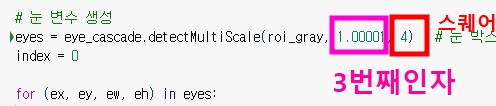

두 숫자 모두 작을수록 "눈같이 보이는 영역"을 다수 탐지

>## 4) 얼굴 정렬
>- 더 작은 눈을 왼쪽눈으로 정의
>- 눈 박스 좌표 계산


>>### (1) 왼쪽 눈 정의

In [ ]:
# 더 작은 눈을 왼쪽눈으로 정의
if eye_1[0] < eye_2[0] : 
  left_eye = eye_1
  right_eye = eye_2

else:
  left_eye = eye_2
  right_eye = eye_1

print(left_eye, right_eye)

(76, 115, 73, 73) (231, 118, 75, 75)


>>### (2) 두 눈의 중심점을 선으로 연결

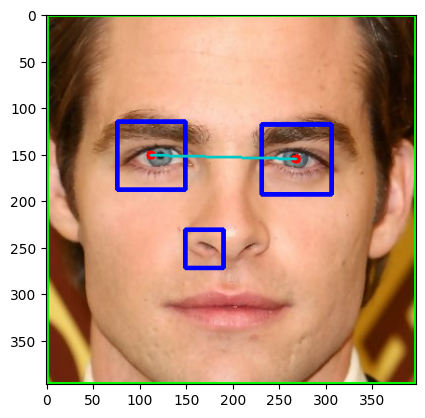

In [ ]:
#두 눈 사이 중심 선으로 연결

left_eye_center = (int(left_eye[0] + (left_eye[2]/2)), int(left_eye[1] + (left_eye[3]/2)))
left_eye_x = left_eye_center[0]
left_eye_y = left_eye_center[1]

right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]

cv2.circle(roi_color, left_eye_center, 5, (255,0,0), -1)
cv2.circle(roi_color, right_eye_center, 5, (255,0,0), -1)
cv2.line(roi_color, right_eye_center, left_eye_center,(0,200,200),2)

plt.imshow(roi_color)
plt.show()

>>### (3) 피타고라스 삼각형으로 선 사이 각도 계산
>>- 목적 : 각도를 기준으로 이미지 회전(수평맞추기)

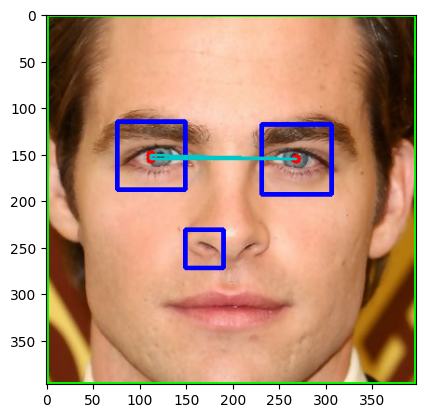

In [ ]:
if left_eye_y > right_eye_y:
  A = (right_eye_x, left_eye_y)
  direction = -1

else:
  A = (left_eye_x, right_eye_y)
  direction = 1

cv2.circle(roi_color, A, 5, (255,0,0), -1)
cv2.line(roi_color, right_eye_center, left_eye_center, (0,200,200), 2)
cv2.line(roi_color, left_eye_center, A, (0,200,200), 2)
cv2.line(roi_color, right_eye_center, A, (0,200,200), 2)

plt.imshow(roi_color)
plt.show()

>>### (4) 눈 수평 맞추기(회전)
>>- 왼쪽눈y좌표 > 오른쪽눈y좌표 : 시계방향 회전
>>- 왼쪽눈y좌표 < 오른쪽눈y좌표 : 반시계방향 
>>- 각도 계산시 직각 삼각형의 두 변 길이 찾아야함
>>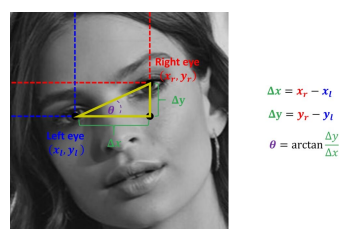

>>- 우리가 보는 왼쪽이 왼쪽눈으로 지정 
>>- Y축이 0에서 거꾸로 나오기 때문에, 왼쪽눈 y좌표가 더 컸을때 시계방향 회전

In [ ]:
delta_x = right_eye_x - left_eye_x
delta_y = right_eye_y - left_eye_y

angle = np.arctan(delta_y / delta_x)
angle = (angle * 180) / np.pi
print(angle)

1.4688007143858246


>>### (5) 이미지 각도 회전 - 세타 만큼 회전

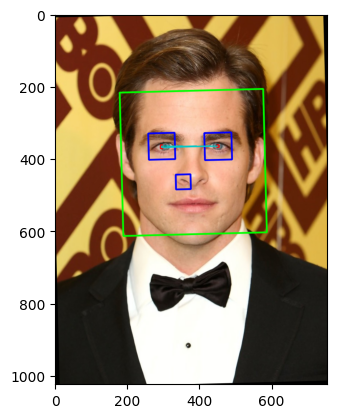

In [ ]:
# 이미지 위치
height, width, _ = image.shape

center = (width//2, height//2)

# 이미지 각도 회전 적용
M = cv2.getRotationMatrix2D(center, (angle), 1.0)

rotated = cv2.warpAffine(image, M, (width, height))

plt.imshow(rotated)
plt.show()